In [1]:
#This model predicts the year the salary gap will close in management positions
#save as model.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import requests
import json


In [2]:
sgap = pd.read_csv('../Resources/clean_salary.csv')
sgap_df = sgap.drop(columns= ["Unnamed: 0"])

In [3]:
# Importing the dataset
sgap = pd.read_csv('../Resources/salary_lin_reg.csv')
sgap_clean = sgap.drop(columns=["Unnamed: 0","Unnamed: 2","Unnamed: 4","Average_Management_Percent_Salary_Gap"])
sgap_clean

,Year,Percent_Salary_Gap
0,2010,-0.050
1,2010,0.116
2,2010,0.218
3,2011,-0.048
4,2011,0.114
5,2011,0.218
6,2012,-0.046
7,2012,0.118
8,2012,0.222
9,2013,-0.044


In [4]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = sgap_df.Year.values.reshape(-1, 1)
y = sgap_df.Average_Management_Percent_Salary_Gap.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (10, 1) (10, 1)


array([[2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

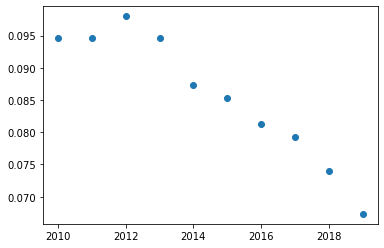

In [5]:
plt.scatter(X, y)

In [6]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [7]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.00205714]]
y-axis intercept:  [4.23244473]


In [11]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2010]]
Max X Value: [[2019]]


In [12]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

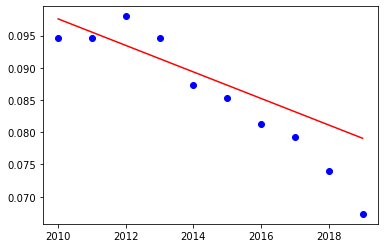

In [13]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [14]:
y_pred = model.predict(X)
y_pred

array([[0.0975873 ],
       [0.09553016],
       [0.09347302],
       [0.09141587],
       [0.08935873],
       [0.08730159],
       [0.08524444],
       [0.0831873 ],
       [0.08113016],
       [0.07907302]])

In [15]:
train_y_pred = model.predict(x_train)
train_y_pred

array([[0.08935873],
       [0.0975873 ],
       [0.08730159],
       [0.09347302],
       [0.09141587],
       [0.09553016]])

In [16]:
sgap_df['Predicted'] = pd.DataFrame(np.concatenate(y_pred))
sgap_df

,Year,Average_Management_Percent_Salary_Gap,Predicted
0,2010,0.094667,0.097587
1,2011,0.094667,0.095530
2,2012,0.098000,0.093473
3,2013,0.094667,0.091416
4,2014,0.087333,0.089359
5,2015,0.085333,0.087302
6,2016,0.081333,0.085244
7,2017,0.079333,0.083187
8,2018,0.074000,0.081130
9,2019,0.067333,0.079073


In [17]:
pred_2019 = model.predict([[2019]])
pred_2019

array([[0.07907302]])

In [18]:
pred_2041 = model.predict([[2034]])
pred_2041

array([[0.04821587]])

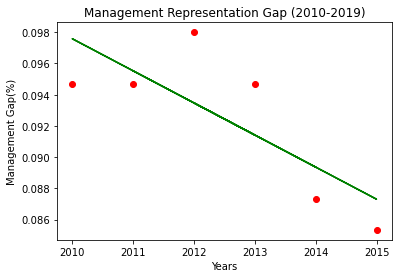

In [24]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train,train_y_pred  , color = "green")
plt.title("Management Representation Gap (2010-2019)")
plt.xlabel("Years")
plt.ylabel("Management Gap(%)")
plt.savefig('management_gap20102019.png', dpi=100)
plt.show()

In [20]:
forecast_y_pred = model.predict([[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035]])
forecast_y_pred

array([[0.07290159],
       [0.07084444],
       [0.0687873 ],
       [0.06673016],
       [0.06467301],
       [0.06261587],
       [0.06055873],
       [0.05850159],
       [0.05644444],
       [0.0543873 ],
       [0.05233016],
       [0.05027301],
       [0.04821587],
       [0.04615873]])

In [21]:
forecast_x_values =[[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035]]
forecast_x_values

[[2022],
 [2023],
 [2024],
 [2025],
 [2026],
 [2027],
 [2028],
 [2029],
 [2030],
 [2031],
 [2032],
 [2033],
 [2034],
 [2035]]

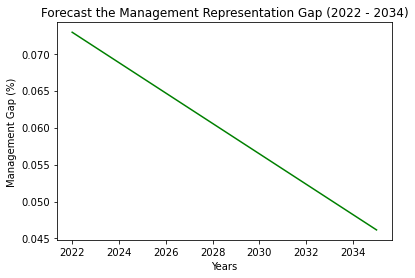

In [25]:
# plt.scatter(forecast_x_values, forecast_y_pred)
plt.plot(forecast_x_values,forecast_y_pred , color = "green")
plt.title("Forecast the Management Representation Gap (2022 - 2034)")
plt.xlabel("Years")
plt.ylabel("Management Gap (%)")
plt.savefig('gender_gap2034.png', dpi=100)
plt.show()

# Practice below!!!!!

In [78]:
# X = sgap_clean.loc[:,'Year']
# X.shape

In [79]:
# # instantiate linearRegression
# model = LinearRegression()

In [80]:
# y_pred = model.predict([[2041]])

In [81]:
# # predict 2019 and compare to determing percent error based of off 2019 prediction vs actual data
# predictions = []
# for i in range(0,2):
#     X = [[2015],[2016],[2017],[2018]]
#     y = sgap_by_year.iloc[i, 5:8].values
#     model.fit(X,y)
#     y_pred = model.predict([[2019]])
#     predictions.append(y_pred)
# flat_list = [item for sublist in predictions for item in sublist]

In [82]:
# # predict 2019 and compare to determing percent error based of off 2019 prediction vs actual data



# X = [[2015],[2016],[2017],[2018]]
# y = sgap_by_year.iloc[:, 0:10].values.reshape(-1, 1)
# print("Shape: ", X, y.shape)
# X

In [83]:
# model.fit(X,y)
# y_pred = model.predict([[2019]])
# predictions.append(y_pred)
# flat_list = [item for sublist in predictions for item in sublist]

In [84]:
# # Assign the data to X and y
# # Note: Sklearn requires a two-dimensional array of values
# # so we use reshape to create this

# X = sgap_clean.Year.values.reshape(-1, 1)
# y = sgap_clean.Average_Management_Percent_Salary_Gap.values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)
# X


In [85]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# X = sgap_clean.Year.values.reshape(-1, 1)
# y = sgap_clean.Average_Management_Percent_Salary_Gap.values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)
# X

In [86]:
# Plot the data

### BEGIN SOLUTION

# plt.scatter(X, y)

In [87]:
# # Create the model and fit the model to the data

# from sklearn.linear_model import LinearRegression

# ### BEGIN SOLUTION

# model = LinearRegression()

In [88]:
# # Fit the model to the data. 
# # Note: This is the training step where you fit the line to the data.

# ### BEGIN SOLUTION

# model.fit(X, y)


In [89]:
# # Print the coefficient and the intercept for the model

# ### BEGIN SOLUTION
# print('Weight coefficients: ', model.coef_)
# print('y-axis intercept: ', model.intercept_)
# ### END SOLUTION

In [90]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

# x_min = np.array([[X.min()]])
# x_max = np.array([[X.max()]])
# print(f"Min X Value: {x_min}")
# print(f"Max X Value: {x_max}")

In [91]:
# dict(np.ndenumerate(pred_2041))